### Topic Modelling for Text Classification: The PyCaret Way vs the Regular Approach

Created on: 7/15/2021

Updated on: 7/20/2021

In [1]:
!pip install GoogleNews
!pip install pycaret

     |████████████████████████████████| 279 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 264 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 3.6 kB/s eta 0:00:01
     |████████████████████████████████| 105 kB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 33.5 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.4 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 1.7 MB 33.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 37.5 MB/s eta 0:00:01
  Cre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Collection

#### Scraping the news from Google related to any accidents in British Columbia. 

In [3]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.clear()

In [4]:
googlenews = GoogleNews(lang='en')
googlenews.get_news('British Columbia accident')
googlenews.search('British Columbia accident')

In [5]:
result_0 = googlenews.page_at(1)

desc_1 = googlenews.get_texts()
link_1 = googlenews.get_links()

for i in list(range(2, 10)):

    result = googlenews.page_at(i)
    desc = googlenews.get_texts()
    link = googlenews.get_links()

    desc_1 = desc_1 + desc
    link_1 = link_1 + link

import pandas as pd

column_names = ["description_text", 'link']
df = pd.DataFrame(columns = column_names)

df['description_text'] = desc_1
df['link'] = link_1
display(df)

df.to_csv('google_news.csv', index = False)

df = df.reset_index()

die = df[df["description_text"].str.contains("die", na=False)]
kill = df[df["description_text"].str.contains("kill", na=False)]
killed = pd.concat([die, kill])
killed['Killed'] = 'Yes'
killed = killed.reset_index(drop=True)

df = pd.merge(df,killed,on='index',how='left')
df = df[['description_text_x','Killed']]

df.Killed = df.Killed.replace(np.NaN, 'No')
df

,description_text,link
0,2 people killed in crash in Burnaby,news.google.com/./articles/CBMiV2h0dHBzOi8vd3d...
1,"Coquihalla accident that killed 1, injured 4, ...",news.google.com/./articles/CBMikgFodHRwczovL3d...
2,B.C. couple injured in serious crash feel left...,news.google.com/./articles/CBMiV2h0dHBzOi8vd3d...
3,Abbotsford traffic: Fatal crash on Highway 1 u...,news.google.com/./articles/CBMiXGh0dHBzOi8vYmM...
4,"Woman dead, 4 taken to hospital after Coquihal...",news.google.com/./articles/CBMid2h0dHBzOi8vd3d...
...,...,...
1427,Police watchdog investigating after woman dies...,https://www.cbc.ca/news/canada/british-columbi...
1428,PHOTOS: Memorial erected to honour Kelowna stu...,https://www.kelownacapnews.com/news/photos-mak...
1429,B.C. police watchdog investigating Terrace ATV...,https://www.princegeorgecitizen.com/bc-news/bc...
1430,Kelowna traffic: 3 killed in crash; Mounties i...,https://bc.ctvnews.ca/3-kelowna-teens-killed-i...


,description_text_x,Killed
0,2 people killed in crash in Burnaby,Yes
1,"Coquihalla accident that killed 1, injured 4, ...",Yes
2,B.C. couple injured in serious crash feel left...,No
3,Abbotsford traffic: Fatal crash on Highway 1 u...,No
4,"Woman dead, 4 taken to hospital after Coquihal...",No
...,...,...
1427,Police watchdog investigating after woman dies...,Yes
1428,PHOTOS: Memorial erected to honour Kelowna stu...,Yes
1429,B.C. police watchdog investigating Terrace ATV...,No
1430,Kelowna traffic: 3 killed in crash; Mounties i...,Yes


In [6]:
df.profile_report()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df_ = df.copy()

In [8]:
# One hot encoding

df = pd.get_dummies(df,columns=['Killed'], drop_first=True)
display(df.head())
display(df.tail())

,description_text_x,Killed_Yes
0,2 people killed in crash in Burnaby,1
1,"Coquihalla accident that killed 1, injured 4, ...",1
2,B.C. couple injured in serious crash feel left...,0
3,Abbotsford traffic: Fatal crash on Highway 1 u...,0
4,"Woman dead, 4 taken to hospital after Coquihal...",0


,description_text_x,Killed_Yes
1427,Police watchdog investigating after woman dies...,1
1428,PHOTOS: Memorial erected to honour Kelowna stu...,1
1429,B.C. police watchdog investigating Terrace ATV...,0
1430,Kelowna traffic: 3 killed in crash; Mounties i...,1
1431,3 Kelowna high school students die in single-v...,1


In [9]:
df2 = df
df2 = df2[['Killed_Yes','description_text_x']]
display(df2.head())
display(df2.tail())

,Killed_Yes,description_text_x
0,1,2 people killed in crash in Burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ..."
2,0,B.C. couple injured in serious crash feel left...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...
4,0,"Woman dead, 4 taken to hospital after Coquihal..."


,Killed_Yes,description_text_x
1427,1,Police watchdog investigating after woman dies...
1428,1,PHOTOS: Memorial erected to honour Kelowna stu...
1429,0,B.C. police watchdog investigating Terrace ATV...
1430,1,Kelowna traffic: 3 killed in crash; Mounties i...
1431,1,3 Kelowna high school students die in single-v...


# Topic Modelling: The Conventional Way

### Preprocessing of Text Data

In [10]:
import re
from bs4 import BeautifulSoup

In [11]:
# Remove HTTP tags
%time df2['news_processed'] = df2['description_text_x'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

CPU times: user 33.3 ms, sys: 1.87 ms, total: 35.1 ms
Wall time: 34.1 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed in crash in Burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",Coquihalla accident that killed 1 injured 4 po...
2,0,B.C. couple injured in serious crash feel left...,B C couple injured in serious crash feel left ...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,Abbotsford traffic Fatal crash on Highway 1 un...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",Woman dead 4 taken to hospital after Coquihall...


In [12]:
#Lower Case
%time df2['news_processed'] = df2['news_processed'].map(lambda x: x.lower())
df2.head()

CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 1.54 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed in crash in burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident that killed 1 injured 4 po...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured in serious crash feel left ...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash on highway 1 un...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken to hospital after coquihall...


In [13]:
#Remove punctuations
%time df2['news_processed'] = df2['news_processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

CPU times: user 5.76 ms, sys: 1.97 ms, total: 7.73 ms
Wall time: 8.23 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed in crash in burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident that killed 1 injured 4 po...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured in serious crash feel left ...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash on highway 1 un...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken to hospital after coquihall...


In [14]:
#Remove unicodes
%time df2['news_processed'] = df2['news_processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

CPU times: user 7.47 ms, sys: 1.57 ms, total: 9.04 ms
Wall time: 8.99 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed in crash in burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident that killed 1 injured 4 po...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured in serious crash feel left ...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash on highway 1 un...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken to hospital after coquihall...


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [16]:
# Remove stopwords
stop_words = stopwords.words('english')
%time df2['news_processed'] = df2['news_processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

CPU times: user 44.3 ms, sys: 815 µs, total: 45.1 ms
Wall time: 45.1 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed crash burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident killed 1 injured 4 possibl...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured serious crash feel left beh...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash highway 1 inves...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken hospital coquihalla crash


In [17]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time df2['news_processed'] = df2['news_processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

CPU times: user 2.11 s, sys: 138 ms, total: 2.25 s
Wall time: 2.26 s


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed crash burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident killed 1 injured 4 possibl...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured serious crash feel left beh...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash highway 1 inves...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken hospital coquihalla crash


In [18]:
#Removing Stop words again after Lemmatize
%time df2['news_processed'] = df2['news_processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())

CPU times: user 46.6 ms, sys: 1.04 ms, total: 47.7 ms
Wall time: 45.4 ms


,Killed_Yes,description_text_x,news_processed
0,1,2 people killed in crash in Burnaby,2 people killed crash burnaby
1,1,"Coquihalla accident that killed 1, injured 4, ...",coquihalla accident killed 1 injured 4 possibl...
2,0,B.C. couple injured in serious crash feel left...,b c couple injured serious crash feel left beh...
3,0,Abbotsford traffic: Fatal crash on Highway 1 u...,abbotsford traffic fatal crash highway 1 inves...
4,0,"Woman dead, 4 taken to hospital after Coquihal...",woman dead 4 taken hospital coquihalla crash


### Embedding of Preprocessed Data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [20]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [21]:
#10 most common and 10 most rare words
common_words = get_n_words(df2['news_processed'], "top", 15)
rare_words = get_n_words(df2['news_processed'], "bottom", 15)

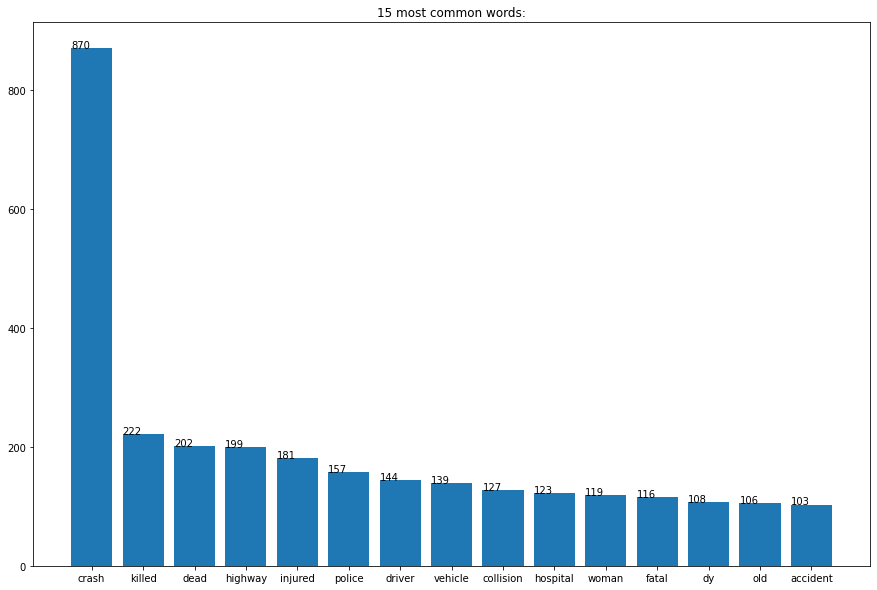

In [22]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .05, yval)
plt.show()

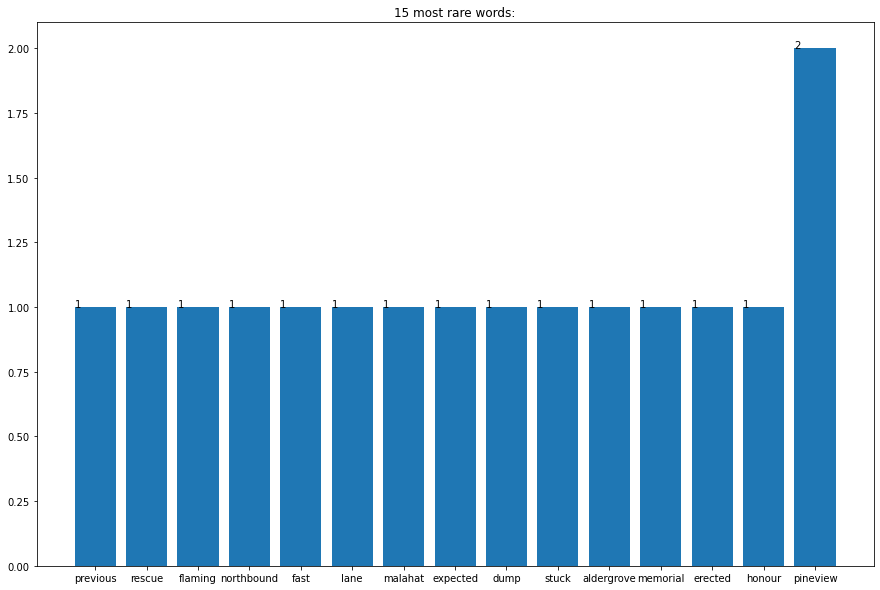

In [23]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

### BOW-TF Embedding

In [24]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

%time tpl_tf = tf_vectorizer.fit_transform(df2['news_processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

CPU times: user 49.9 ms, sys: 2.79 ms, total: 52.7 ms
Wall time: 51.3 ms


'Bow-TF :'

(1432, 255)

,20,23,abbotsford,abbotsford traffic,abbotsford traffic fatal,accident,agency,agency review,agency review possible,airlifted,...,wolf,wolf forward,wolf forward dy,woman,woman dead,woman dead taken,woman dy,wrongdoing,year,year old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [25]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
df_tf_m.drop(columns=['description_text_x', 'news_processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(1432, 256)


,Killed_Yes,20,23,abbotsford,abbotsford traffic,abbotsford traffic fatal,accident,agency,agency review,agency review possible,...,wolf,wolf forward,wolf forward dy,woman,woman dead,woman dead taken,woman dy,wrongdoing,year,year old
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


,Killed_Yes,20,23,abbotsford,abbotsford traffic,abbotsford traffic fatal,accident,agency,agency review,agency review possible,...,wolf,wolf forward,wolf forward dy,woman,woman dead,woman dead taken,woman dy,wrongdoing,year,year old
1427,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1428,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BoW-TF:IDF Embedding

In [26]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['news_processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df2.index)
display(df_tfidf.head())

CPU times: user 51.3 ms, sys: 4.86 ms, total: 56.2 ms
Wall time: 57.2 ms


'Bow-TF:IDF :'

(1432, 104)

,abbotsford,abbotsford traffic,accident,airlifted,airlifted hospital,another,atv,atv crash,auto,bc,...,vehicle crash,video,watchdog,west,wildfire,wolf,woman,woman dead,year,year old
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.412777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.357547,0.395751,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.326143,0.416005,0.0,0.0


In [27]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['description_text_x', 'news_processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(1432, 105)


,Killed_Yes,abbotsford,abbotsford traffic,accident,airlifted,airlifted hospital,another,atv,atv crash,auto,...,vehicle crash,video,watchdog,west,wildfire,wolf,woman,woman dead,year,year old
0,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1,0.000000,0.000000,0.412777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0,0.357547,0.395751,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.326143,0.416005,0.0,0.0


,Killed_Yes,abbotsford,abbotsford traffic,accident,airlifted,airlifted hospital,another,atv,atv crash,auto,...,vehicle crash,video,watchdog,west,wildfire,wolf,woman,woman dead,year,year old
1427,1,0.0,0.0,0.0,0.0,0.0,0.0,0.376070,0.393511,0.0,...,0.000000,0.0,0.355846,0.0,0.0,0.0,0.299091,0.0,0.0,0.0
1428,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1429,0,0.0,0.0,0.0,0.0,0.0,0.0,0.416296,0.435604,0.0,...,0.000000,0.0,0.393909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1430,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1431,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.423604,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [29]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['Not_killed', 'killed'], yticklabels=['Not_killed', 'killed'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [30]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Killed_Yes']
    X = df.drop('Killed_Yes', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

### Models on TF - Bag of Words data

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (1217, 255)
Test Data Dimensions :  (215, 255)

 Random Forest Classifier
CPU times: user 1.26 s, sys: 10.2 ms, total: 1.27 s
Wall time: 1.27 s

 Confusion Matrix


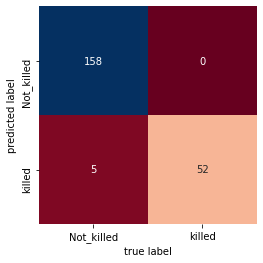


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       158
           1       1.00      0.91      0.95        57

    accuracy                           0.98       215
   macro avg       0.98      0.96      0.97       215
weighted avg       0.98      0.98      0.98       215

Overall Accuracy :  97.67
Precision Score :  100.0
Recall Score :  91.23
AUC :  100.0 



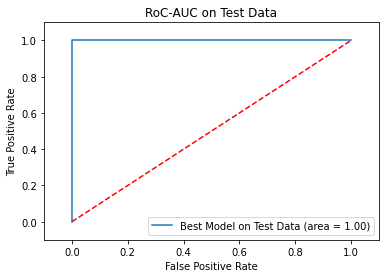

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 941 ms, sys: 3.9 ms, total: 945 ms
Wall time: 944 ms

 Confusion Matrix


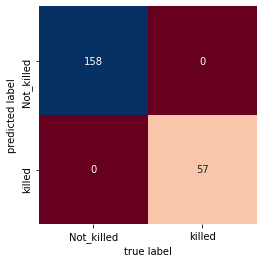


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        57

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Overall Accuracy :  100.0
Precision Score :  100.0
Recall Score :  100.0
AUC :  100.0 



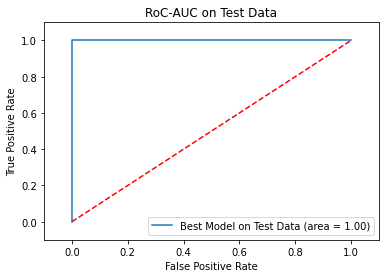

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 191 ms, sys: 2.78 ms, total: 194 ms
Wall time: 193 ms

 Confusion Matrix


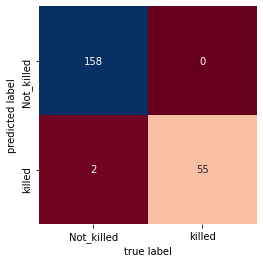


 Classification Report 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       158
           1       1.00      0.96      0.98        57

    accuracy                           0.99       215
   macro avg       0.99      0.98      0.99       215
weighted avg       0.99      0.99      0.99       215

Overall Accuracy :  99.07
Precision Score :  100.0
Recall Score :  96.49
AUC :  98.29 



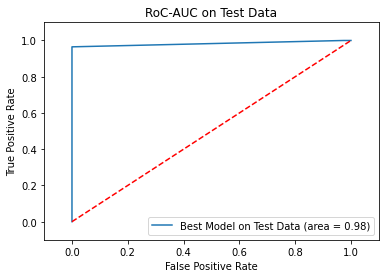

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 8.07 ms, sys: 126 µs, total: 8.2 ms
Wall time: 7.22 ms

 Confusion Matrix


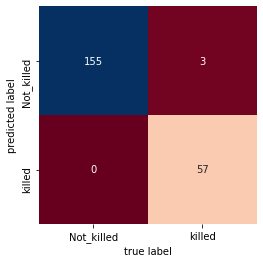


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       158
           1       0.95      1.00      0.97        57

    accuracy                           0.99       215
   macro avg       0.97      0.99      0.98       215
weighted avg       0.99      0.99      0.99       215

Overall Accuracy :  98.6
Precision Score :  95.0
Recall Score :  100.0
AUC :  99.91 



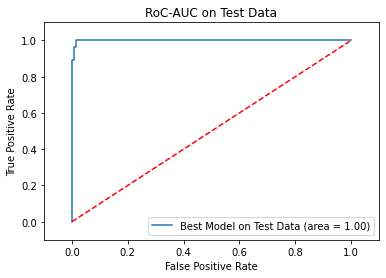

--------------------------------------------------------------------------
CPU times: user 3.98 s, sys: 82.8 ms, total: 4.06 s
Wall time: 4.04 s


In [31]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)

### Models on IDF - Bag of Words

Models on IDF - Bag of Words
Train Data Dimensions :  (1217, 104)
Test Data Dimensions :  (215, 104)

 Random Forest Classifier
CPU times: user 1.21 s, sys: 5.67 ms, total: 1.22 s
Wall time: 1.22 s

 Confusion Matrix


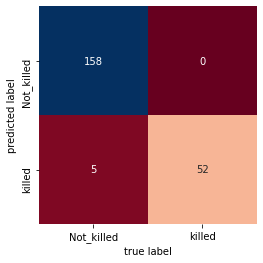


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       158
           1       1.00      0.91      0.95        57

    accuracy                           0.98       215
   macro avg       0.98      0.96      0.97       215
weighted avg       0.98      0.98      0.98       215

Overall Accuracy :  97.67
Precision Score :  100.0
Recall Score :  91.23
AUC :  99.58 



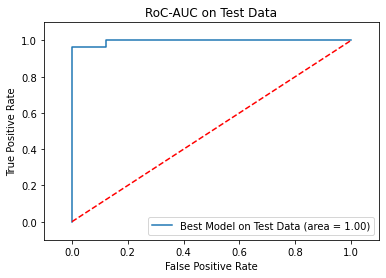

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 1.54 s, sys: 2.49 ms, total: 1.54 s
Wall time: 1.54 s

 Confusion Matrix


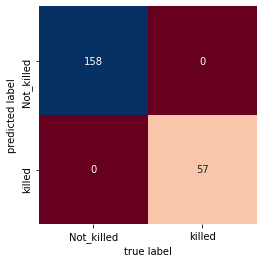


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        57

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Overall Accuracy :  100.0
Precision Score :  100.0
Recall Score :  100.0
AUC :  100.0 



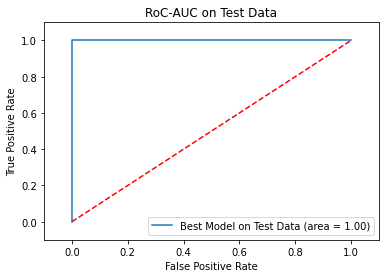

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 134 ms, sys: 21 µs, total: 134 ms
Wall time: 133 ms

 Confusion Matrix


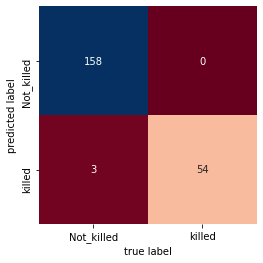


 Classification Report 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       158
           1       1.00      0.95      0.97        57

    accuracy                           0.99       215
   macro avg       0.99      0.97      0.98       215
weighted avg       0.99      0.99      0.99       215

Overall Accuracy :  98.6
Precision Score :  100.0
Recall Score :  94.74
AUC :  96.57 



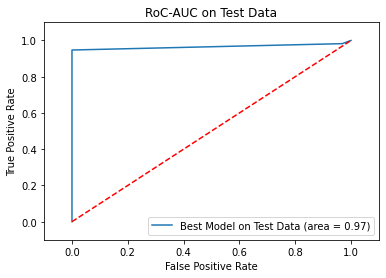

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 5.37 ms, sys: 935 µs, total: 6.31 ms
Wall time: 5.63 ms

 Confusion Matrix


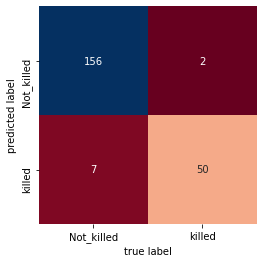


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.96      0.88      0.92        57

    accuracy                           0.96       215
   macro avg       0.96      0.93      0.94       215
weighted avg       0.96      0.96      0.96       215

Overall Accuracy :  95.81
Precision Score :  96.15
Recall Score :  87.72
AUC :  99.51 



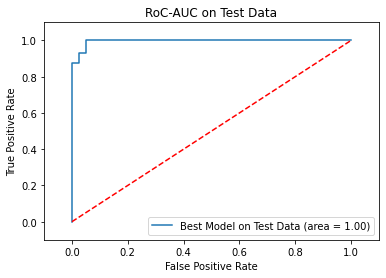

--------------------------------------------------------------------------
CPU times: user 4.44 s, sys: 65.2 ms, total: 4.5 s
Wall time: 4.47 s


In [32]:
print('Models on IDF - Bag of Words')
%time model_dvt(df_tfidf_m)

### Looking for the best params: Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
Y = df_tf_m['Killed_Yes']
X = df_tf_m.drop('Killed_Yes', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (1217, 255)
Test Data Dimensions :  (215, 255)


In [35]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train, Y_train)

CPU times: user 992 ms, sys: 121 ms, total: 1.11 s
Wall time: 39.5 s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

Best Parameters :  {'learning_rate': 1.0, 'n_estimators': 100}
Best_ROC-AUC :  100.0
Best model :  AdaBoostClassifier(n_estimators=100)

 Confusion Matrix


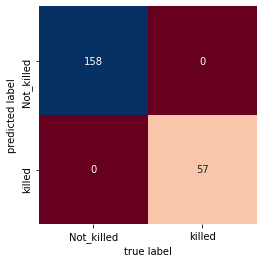


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        57

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Overall Accuracy :  100.0
Precision Score :  100.0
Recall Score :  100.0
AUC :  100.0 



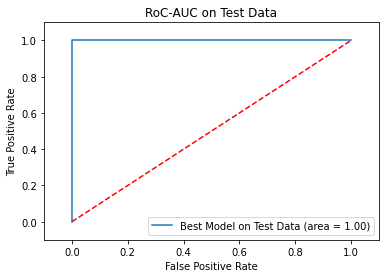

--------------------------------------------------------------------------
CPU times: user 2.42 s, sys: 14.2 ms, total: 2.43 s
Wall time: 2.43 s
Cross Validation Accuracy :  99.54
Cross Validation Accuracy in every fold :  [100.   100.   100.    95.45 100.   100.   100.   100.   100.   100.  ]


In [36]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

In [37]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

CPU times: user 2.6 s, sys: 92.5 ms, total: 2.69 s
Wall time: 1min 56s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 7, 5, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best_ROC-AUC :  100.0
Best model :  RandomForestClassifier(criterion='entropy', max_depth=10)

 Confusion Matrix


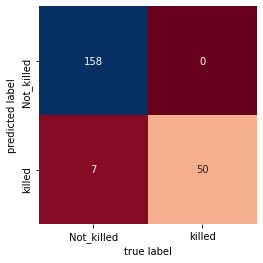


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       158
           1       1.00      0.88      0.93        57

    accuracy                           0.97       215
   macro avg       0.98      0.94      0.96       215
weighted avg       0.97      0.97      0.97       215

Overall Accuracy :  96.74
Precision Score :  100.0
Recall Score :  87.72
AUC :  100.0 



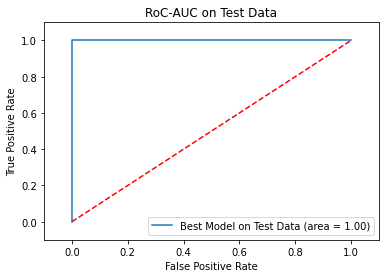

--------------------------------------------------------------------------
CPU times: user 2.12 s, sys: 12.6 ms, total: 2.14 s
Wall time: 2.13 s
Cross Validation Accuracy :  96.75
Cross Validation Accuracy in every fold :  [100.   100.   100.   100.    81.82 100.    90.48  95.24 100.   100.  ]


In [38]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

# Topic Modelling: The PyCaret Way

In [39]:
df_.head()

df_.columns = ['News', 'Kill_Flag']
df_ = df_[['Kill_Flag', 'News']]
df_

,Kill_Flag,News
0,Yes,2 people killed in crash in Burnaby
1,Yes,"Coquihalla accident that killed 1, injured 4, ..."
2,No,B.C. couple injured in serious crash feel left...
3,No,Abbotsford traffic: Fatal crash on Highway 1 u...
4,No,"Woman dead, 4 taken to hospital after Coquihal..."
...,...,...
1427,Yes,Police watchdog investigating after woman dies...
1428,Yes,PHOTOS: Memorial erected to honour Kelowna stu...
1429,No,B.C. police watchdog investigating Terrace ATV...
1430,Yes,Kelowna traffic: 3 killed in crash; Mounties i...


In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [41]:
from pycaret.nlp import *
%time su_1 = setup(data = df_, target = 'News', custom_stopwords=stop_words, session_id=21)

Description,Value
session_id,21
Documents,1432
Vocab Size,378
Custom Stopwords,True


CPU times: user 7.81 s, sys: 335 ms, total: 8.14 s
Wall time: 8.8 s


In [42]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [43]:
%time m1 = create_model(model='lda', multi_core=True)

CPU times: user 1.82 s, sys: 207 ms, total: 2.02 s
Wall time: 2.6 s


In [44]:
%time lda_data = assign_model(m1)

CPU times: user 1.32 s, sys: 92.9 ms, total: 1.41 s
Wall time: 1.32 s


In [45]:
lda_data.head()

,Kill_Flag,News,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Yes,people kill crash burnaby,0.052481,0.051462,0.845540,0.050517,Topic 2,0.85
1,Yes,accident kill injure possibly cause driver suf...,0.431464,0.028818,0.028166,0.511552,Topic 3,0.51
2,No,couple injure serious crash feel leave behind ...,0.936870,0.021098,0.021111,0.020921,Topic 0,0.94
3,No,traffic fatal crash highway investigation,0.871135,0.043106,0.042937,0.042823,Topic 0,0.87
4,No,woman dead take hospital crash,0.042629,0.871028,0.043507,0.042836,Topic 1,0.87


In [46]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

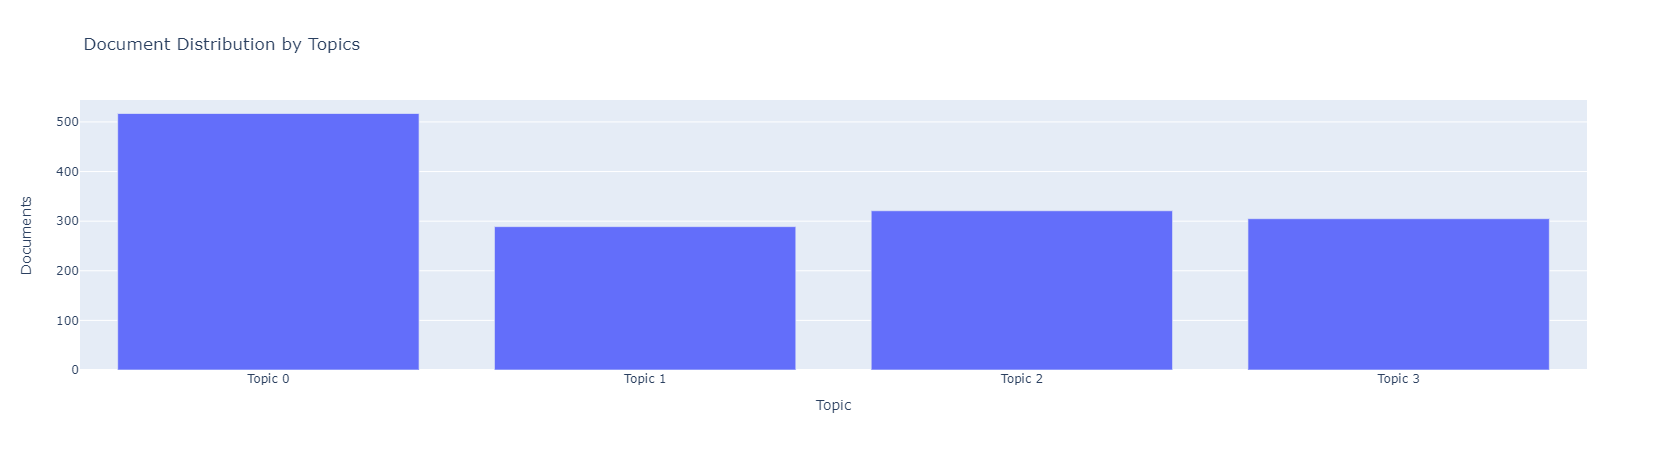

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.134636 -0.202442       1        1  34.977758
3      0.229283  0.173179       2        1  22.684697
2     -0.161584  0.174025       3        1  21.905580
1     -0.202335 -0.144762       4        1  20.431966, topic_info=        Term        Freq       Total Category  logprob  loglift
7     injure  167.000000  167.000000  Default  30.0000  30.0000
33      year   79.000000   79.000000  Default  29.0000  29.0000
53       die  123.000000  123.000000  Default  28.0000  28.0000
25  hospital  117.000000  117.000000  Default  27.0000  27.0000
31       old   93.000000   93.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
30       man   24.345500   56.538561   Topic4  -4.2426   0.7455
91  wildfire   24.509506   62.521149   Topic4  -4.2359   0.6516
6     driver   34.973801  141.957886   Topic4  -3.8804   0.1871
2       kill   25.542927  224.324770   Topic4  -4.1946  -0.5847
40   vehicle   16.949392  130.155592   Topic4  -4.6047  -0.4504

[217 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4         1  0.302592   accident
4         2  0.594377   accident
4         4  0.097262   accident
111       1  0.951645     agency
315       3  0.913785        air
...     ...       ...        ...
27        4  0.402773      woman
180       2  0.957648  workplace
33        1  0.012605       year
33        4  0.983220       year
216       1  0.930397      young

[223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

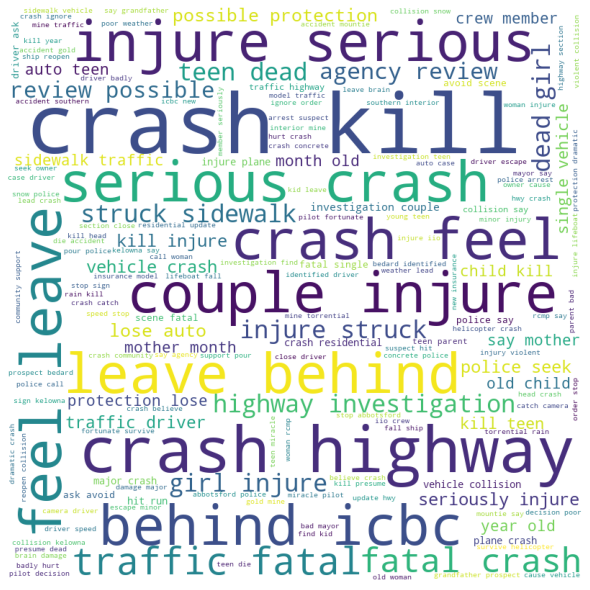

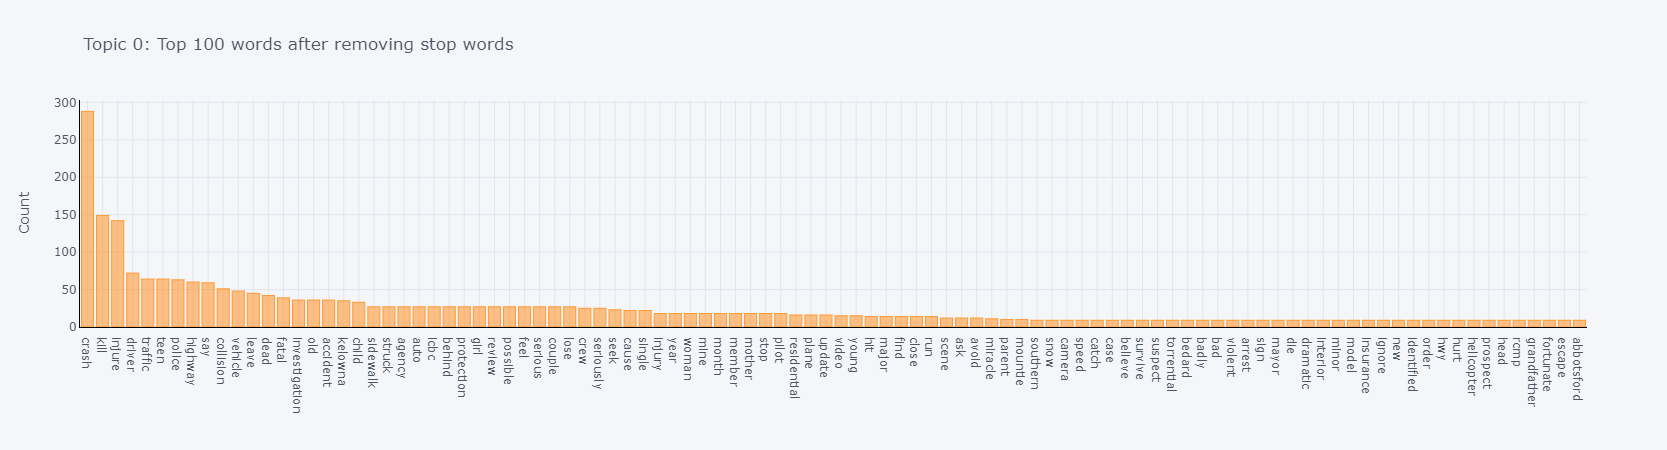

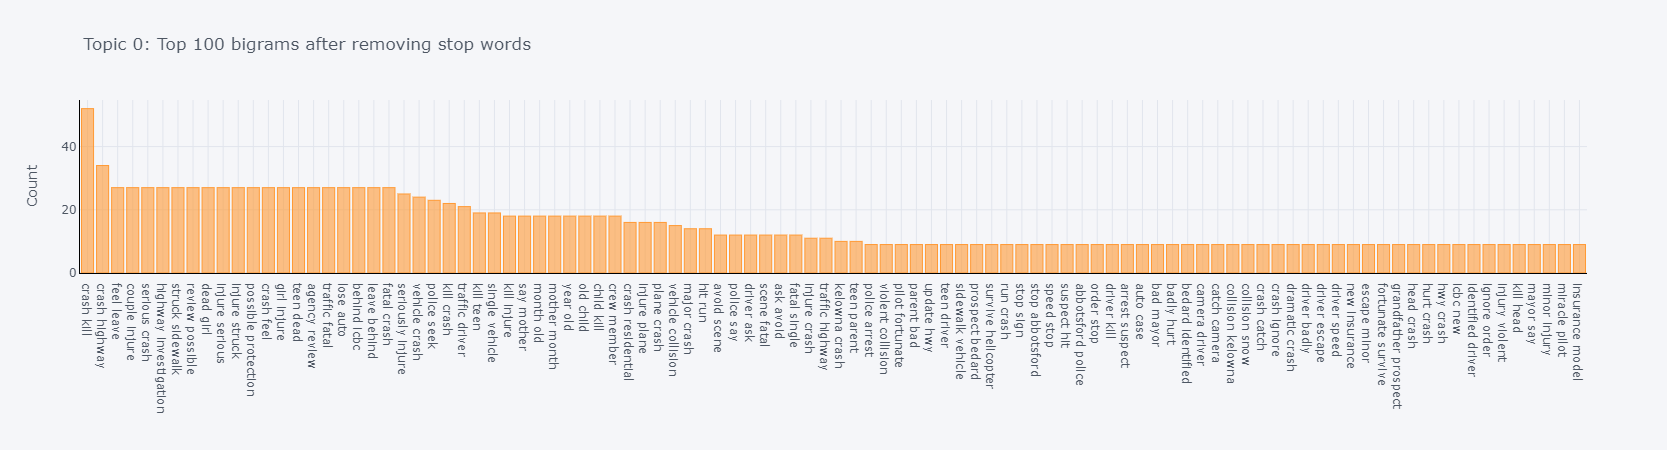

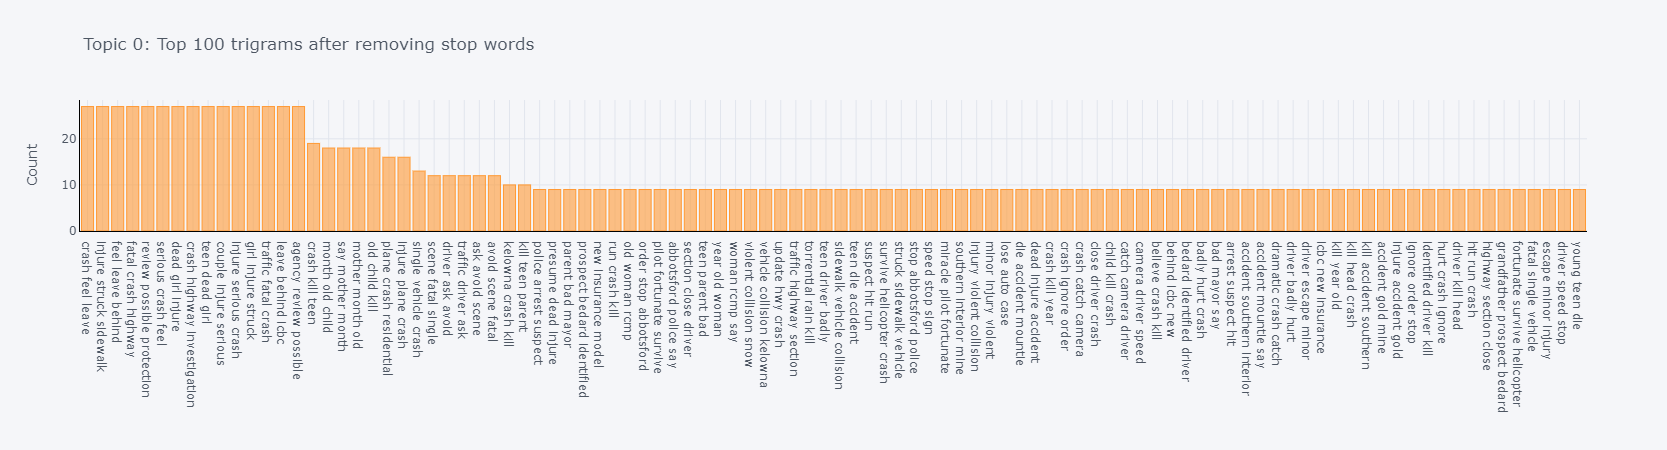

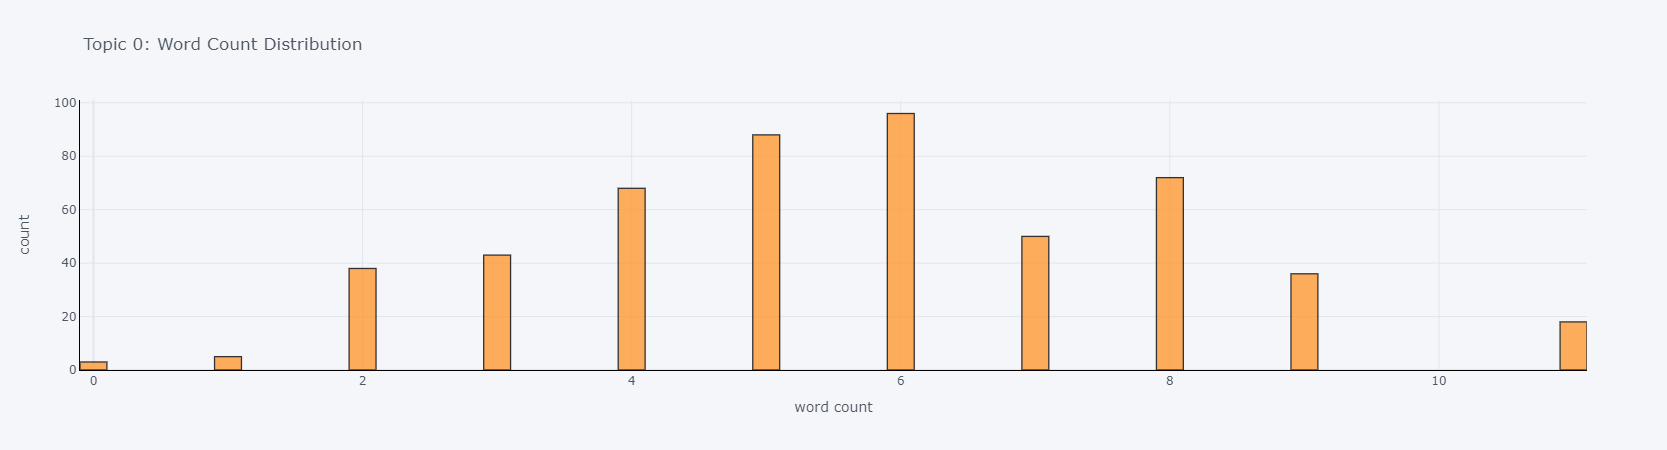

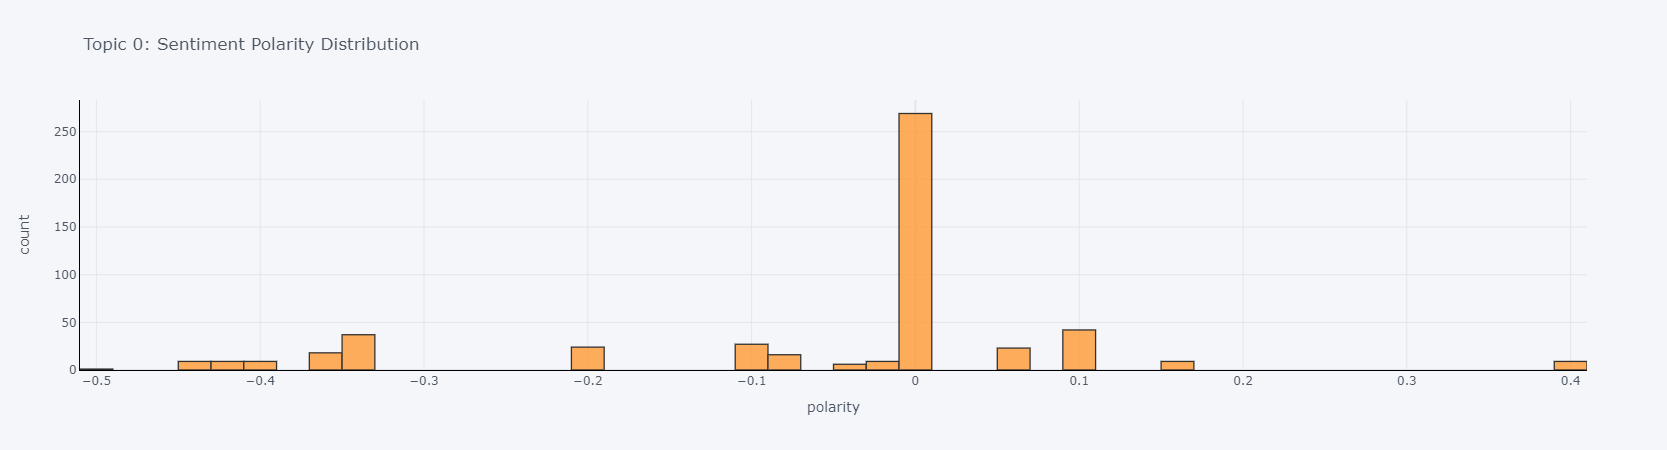

In [47]:
plot_model(m1, plot='topic_distribution')
plot_model(m1, plot='topic_model')
plot_model(m1, plot='wordcloud', topic_num = 'Topic 0')
plot_model(m1, plot='frequency', topic_num = 'Topic 0')
plot_model(m1, plot='bigram', topic_num = 'Topic 0')
plot_model(m1, plot='trigram', topic_num = 'Topic 0')
plot_model(m1, plot='distribution', topic_num = 'Topic 0')
plot_model(m1, plot='sentiment', topic_num = 'Topic 0')

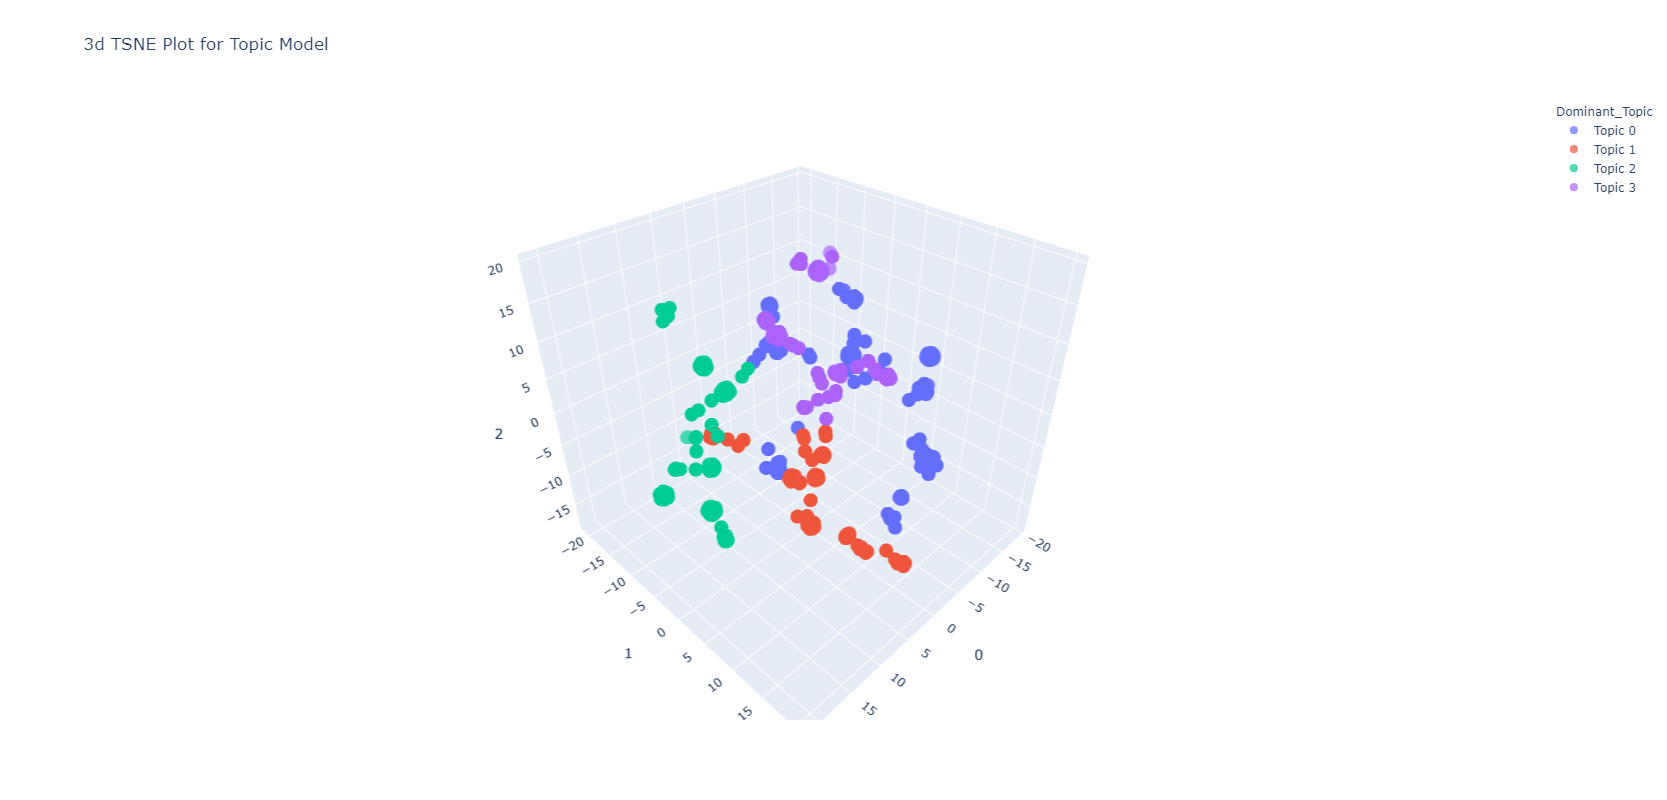

In [49]:
plot_model(m1, plot = 'tsne')

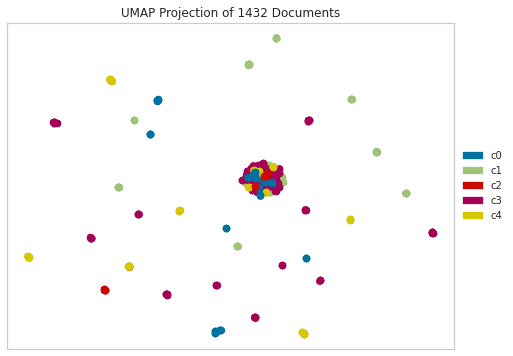

In [50]:
plot_model(m1, plot = 'umap')

In [51]:
lda_data = lda_data[['Kill_Flag', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3']]
lda_data.head()

,Kill_Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,Yes,0.052481,0.051462,0.845540,0.050517
1,Yes,0.431464,0.028818,0.028166,0.511552
2,No,0.936870,0.021098,0.021111,0.020921
3,No,0.871135,0.043106,0.042937,0.042823
4,No,0.042629,0.871028,0.043507,0.042836


In [52]:
from pycaret.classification import *

In [53]:
%time pce_1 = setup(data = lda_data, target = 'Kill_Flag', session_id = 5, train_size = 0.85)

,Description,Value
0,session_id,5
1,Target,Kill_Flag
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1432, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


CPU times: user 999 ms, sys: 43.7 ms, total: 1.04 s
Wall time: 3.66 s


In [54]:
%time compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9975,0.9954,0.9908,1.0000,0.9953,0.9936,0.9937,0.0120
et,Extra Trees Classifier,0.9975,1.0000,0.9938,0.9970,0.9953,0.9937,0.9937,0.2860
rf,Random Forest Classifier,0.9959,0.9999,0.9908,0.9941,0.9923,0.9895,0.9897,0.3370
xgboost,Extreme Gradient Boosting,0.9959,0.9982,0.9877,0.9970,0.9922,0.9894,0.9895,13.3350
lightgbm,Light Gradient Boosting Machine,0.9959,0.9985,0.9908,0.9940,0.9923,0.9895,0.9896,0.1600
catboost,CatBoost Classifier,0.9934,0.9982,0.9814,0.9940,0.9874,0.9830,0.9833,1.9300
knn,K Neighbors Classifier,0.9877,0.9948,0.9845,0.9703,0.9771,0.9686,0.9689,0.0720
gbc,Gradient Boosting Classifier,0.9737,0.9942,0.9194,0.9807,0.9471,0.9297,0.9322,0.0900
ada,Ada Boost Classifier,0.8833,0.9589,0.7047,0.8350,0.7592,0.6834,0.6912,0.0680
lr,Logistic Regression,0.7354,0.5476,0.0000,0.0000,0.0000,0.0000,0.0000,0.1210


CPU times: user 9.91 s, sys: 137 ms, total: 10 s
Wall time: 2min 53s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [55]:
#step1 : model creation
%time pce_1_m1 = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9918,0.9844,0.9688,1.0000,0.9841,0.9786,0.9788
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9836,0.9697,0.9394,1.0000,0.9688,0.9577,0.9585
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


CPU times: user 663 ms, sys: 14.6 ms, total: 678 ms
Wall time: 703 ms


In [56]:
#step2 : model tuning
%time tuned_pce_1_m1 = tune_model(pce_1_m1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9918,0.9944,1.0000,0.9697,0.9846,0.9790,0.9792
3,0.9918,0.9840,0.9688,1.0000,0.9841,0.9786,0.9788
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9836,0.9690,0.9394,1.0000,0.9688,0.9577,0.9585
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9917,0.9840,0.9688,1.0000,0.9841,0.9785,0.9788
9,0.9752,0.9942,0.9062,1.0000,0.9508,0.9343,0.9363


CPU times: user 1.94 s, sys: 24 ms, total: 1.96 s
Wall time: 2.12 s


In [57]:
#step3 : getting insights from model perfromance
%time evaluate_model(tuned_pce_1_m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

CPU times: user 504 ms, sys: 4.13 ms, total: 508 ms
Wall time: 501 ms


* http://www.pycaret.org/tutorials/html/NLP101.html

* https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20NLP.ipynb

* https://github.com/prateek025/SMS_Spam_Ham/blob/master/Spam-Ham.ipynb